In [1]:
import numpy as np
import xarray as xa
from matplotlib import pyplot as plt
import cartopy

In [2]:
mask = xa.open_dataset('CODSUS/MERRA2/codsus_merra2-1deg_mask.nc')
print(mask)
print(mask.crs)

<xarray.Dataset>
Dimensions:      (lat: 68, lon: 141)
Coordinates:
  * lat          (lat) float32 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
  * lon          (lon) float32 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
Data variables:
    crs          float32 ...
    codsus_mask  (lat, lon) float32 ...
Attributes:
    title:        CODSUS mask for MERRA-2
    summary:      Mask on a lat/lon subgrid used for MERRA-2 data showing the...
    Conventions:  CF 1.6
<xarray.DataArray 'crs' ()>
array(9.96921e+36, dtype=float32)
Attributes:
    grid_mapping_name:  latitude_longitude


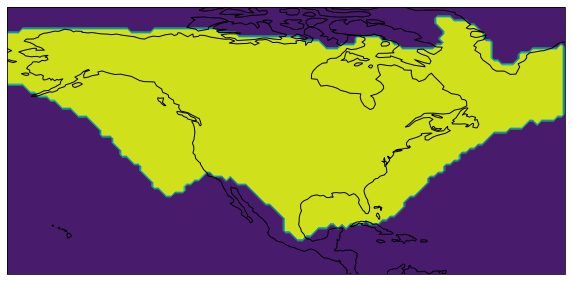

In [3]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.contourf(mask.lon, mask.lat, mask.codsus_mask, transform=cartopy.crs.PlateCarree())
ax.coastlines()
plt.show()

In [12]:
data = xa.open_dataset('CODSUS/MERRA2/codsus_merra2-1deg_1wide_2003.nc')
print(data)

<xarray.Dataset>
Dimensions:     (front: 5, lat: 68, lon: 141, time: 2866)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  (front) object ...
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
  * time        (time) datetime64[ns] 2003-01-03T12:00:00 ... 2003-12-31T21:0...
Dimensions without coordinates: front
Data variables:
    crs         float64 ...
    fronts      (time, front, lat, lon) float32 ...
Attributes:
    title:        Coded surface bulletins with masking on a merra2-1deg grid.
    history:      2019-03-13T19:26:18.614016: ./../Python/jsonPolysToMaskedNe...
    institution:  North Carolina Institute for Climate Studies (NCICS)
    Conventions:  CF-1.7


<xarray.Dataset>
Dimensions:     (lat: 68, lon: 141, time: 2866)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  object ...
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
  * time        (time) datetime64[ns] 2003-01-03T12:00:00 ... 2003-12-31T21:0...
Data variables:
    crs         float64 ...
    fronts      (time, lat, lon) float32 ...
Attributes:
    title:        Coded surface bulletins with masking on a merra2-1deg grid.
    history:      2019-03-13T19:26:18.614016: ./../Python/jsonPolysToMaskedNe...
    institution:  North Carolina Institute for Climate Studies (NCICS)
    Conventions:  CF-1.7
2003-01-03T12:00:00.000000000
2003-01-03T15:00:00.000000000
2003-01-03T18:00:00.000000000
2003-01-03T21:00:00.000000000
2003-01-04T00:00:00.000000000
2003-01-04T03:00:00.000000000
2003-01-04T06:00:00.000000000
2003-01-04T09:00:00.000000000
2003-01-04T12:00:00.000000000
2003-01-04T15:00:00.000000000

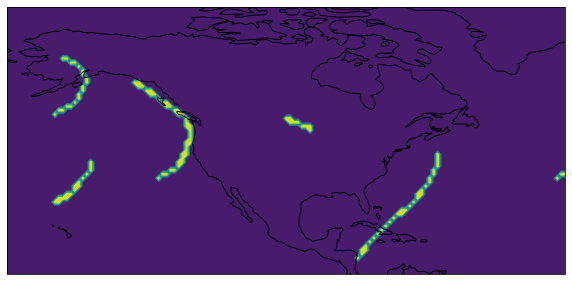

In [13]:
fig = plt.figure(figsize=(10, 7))
field = data.sel(front=0)
print(field)
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
for time in field.time[:10]:
    step = field.sel(time=time)
    print(time.data)
    ax.contourf(step.lon, step.lat, step.fronts, transform=cartopy.crs.PlateCarree())
# ax.scatter(mask.lon, mask.lat, field[:,:,0], transform=cartopy.crs.PlateCarree())
ax.coastlines()
plt.show()

In [22]:
front0 = data.sel(front=0)
print(front0)
print('\nTYPE: ', front0.front_type)
print('\nTIME: ', front0.time)

<xarray.Dataset>
Dimensions:     (lat: 68, lon: 141, time: 2866)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  object ...
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
  * time        (time) datetime64[ns] 2003-01-03T12:00:00 ... 2003-12-31T21:0...
Data variables:
    crs         float64 ...
    fronts      (time, lat, lon) float32 ...
Attributes:
    title:        Coded surface bulletins with masking on a merra2-1deg grid.
    history:      2019-03-13T19:26:18.614016: ./../Python/jsonPolysToMaskedNe...
    institution:  North Carolina Institute for Climate Studies (NCICS)
    Conventions:  CF-1.7

TYPE:  <xarray.DataArray 'front_type' ()>
array('cold', dtype='<U4')
Coordinates:
    front_type  <U4 'cold'
Attributes:
    long_name:  kind of front

TIME:  <xarray.DataArray 'time' (time: 2866)>
array(['2003-01-03T12:00:00.000000000', '2003-01-03T15:00:00.000000000',
       '2003-01-03T18:00:00

[0. 1.]


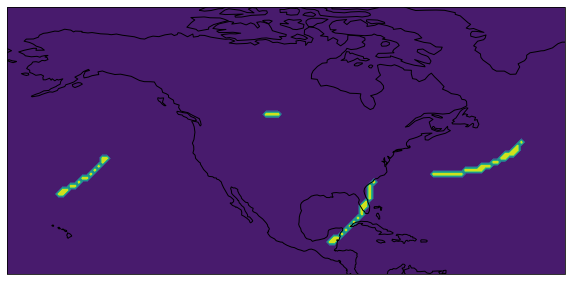

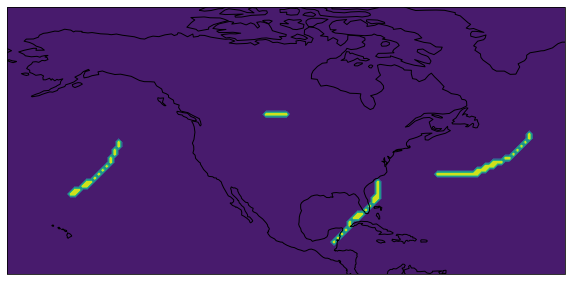

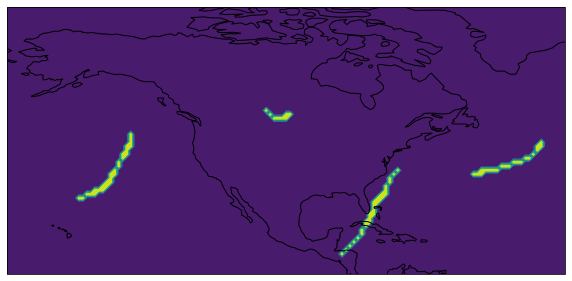

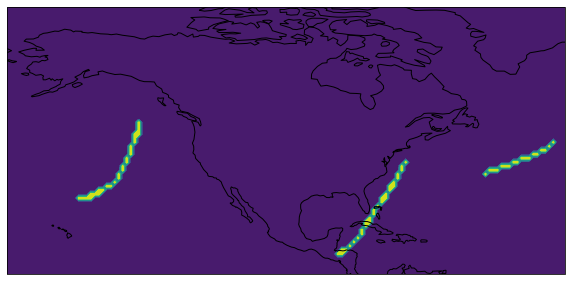

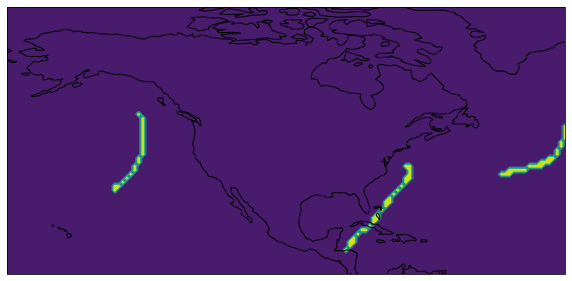

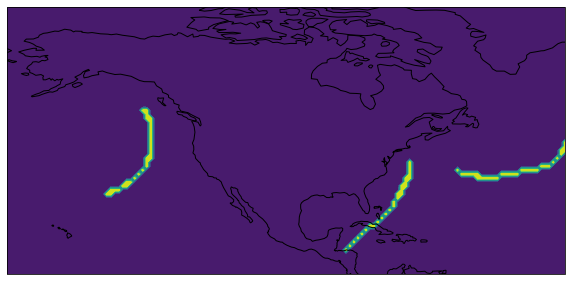

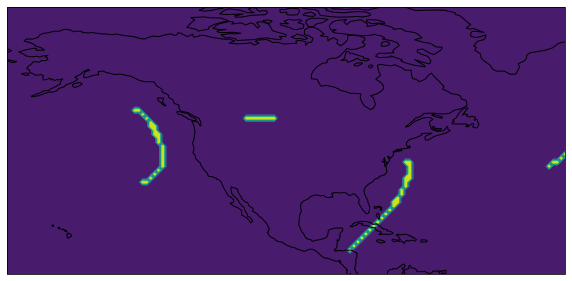

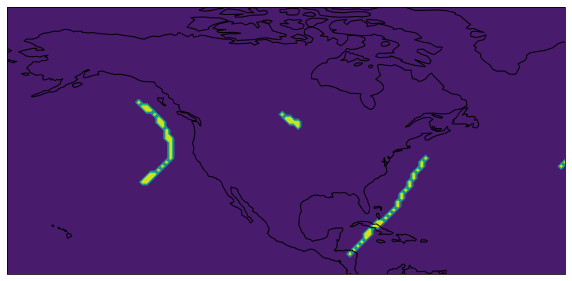

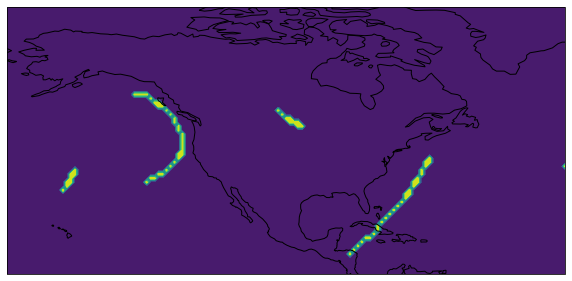

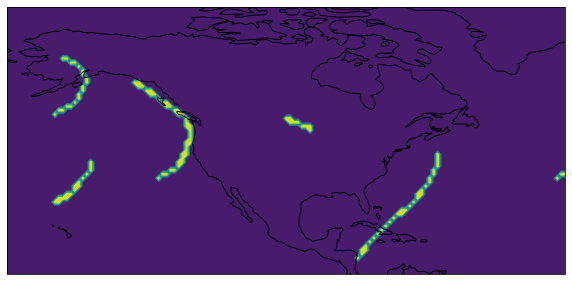

In [27]:
front = front0.fronts
print(np.unique(front))

for time in front.time[:10]:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
    ax.contourf(front.lon, front.lat, front.sel(time=time), transform=cartopy.crs.PlateCarree())
    ax.coastlines()
    plt.show()

In [37]:
front1 = data.sel(front=1)
print(front1)
print('\nTYPE: ', front1.front_type)
print(np.unique(front1.fronts))

<xarray.Dataset>
Dimensions:     (lat: 68, lon: 141, time: 2866)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  object ...
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
  * time        (time) datetime64[ns] 2003-01-03T12:00:00 ... 2003-12-31T21:0...
Data variables:
    crs         float64 ...
    fronts      (time, lat, lon) float32 ...
Attributes:
    title:        Coded surface bulletins with masking on a merra2-1deg grid.
    history:      2019-03-13T19:26:18.614016: ./../Python/jsonPolysToMaskedNe...
    institution:  North Carolina Institute for Climate Studies (NCICS)
    Conventions:  CF-1.7

TYPE:  <xarray.DataArray 'front_type' ()>
array('warm', dtype='<U4')
Coordinates:
    front_type  <U4 'warm'
Attributes:
    long_name:  kind of front
[0. 1.]


In [36]:
front2 = data.sel(front=2)
print(front2)
print('\nTYPE: ', front2.front_type)
print(np.unique(front2.fronts))

<xarray.Dataset>
Dimensions:     (lat: 68, lon: 141, time: 2866)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  object ...
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
  * time        (time) datetime64[ns] 2003-01-03T12:00:00 ... 2003-12-31T21:0...
Data variables:
    crs         float64 ...
    fronts      (time, lat, lon) float32 ...
Attributes:
    title:        Coded surface bulletins with masking on a merra2-1deg grid.
    history:      2019-03-13T19:26:18.614016: ./../Python/jsonPolysToMaskedNe...
    institution:  North Carolina Institute for Climate Studies (NCICS)
    Conventions:  CF-1.7

TYPE:  <xarray.DataArray 'front_type' ()>
array('stationary', dtype='<U10')
Coordinates:
    front_type  <U10 'stationary'
Attributes:
    long_name:  kind of front
[0. 1.]


In [35]:
front3 = data.sel(front=3)
print(front3)
print('\nTYPE: ', front3.front_type)
print(np.unique(front3.fronts))

<xarray.Dataset>
Dimensions:     (lat: 68, lon: 141, time: 2866)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  object ...
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
  * time        (time) datetime64[ns] 2003-01-03T12:00:00 ... 2003-12-31T21:0...
Data variables:
    crs         float64 ...
    fronts      (time, lat, lon) float32 ...
Attributes:
    title:        Coded surface bulletins with masking on a merra2-1deg grid.
    history:      2019-03-13T19:26:18.614016: ./../Python/jsonPolysToMaskedNe...
    institution:  North Carolina Institute for Climate Studies (NCICS)
    Conventions:  CF-1.7

TYPE:  <xarray.DataArray 'front_type' ()>
array('occluded', dtype='<U8')
Coordinates:
    front_type  <U8 'occluded'
Attributes:
    long_name:  kind of front
[0. 1.]


In [34]:
front4 = data.sel(front=4)
print(front4)
print('\nTYPE: ', front4.front_type)
print(np.unique(front4.fronts))

<xarray.Dataset>
Dimensions:     (lat: 68, lon: 141, time: 2866)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  object ...
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
  * time        (time) datetime64[ns] 2003-01-03T12:00:00 ... 2003-12-31T21:0...
Data variables:
    crs         float64 ...
    fronts      (time, lat, lon) float32 ...
Attributes:
    title:        Coded surface bulletins with masking on a merra2-1deg grid.
    history:      2019-03-13T19:26:18.614016: ./../Python/jsonPolysToMaskedNe...
    institution:  North Carolina Institute for Climate Studies (NCICS)
    Conventions:  CF-1.7

TYPE:  <xarray.DataArray 'front_type' ()>
array('none', dtype='<U4')
Coordinates:
    front_type  <U4 'none'
Attributes:
    long_name:  kind of front
[0. 1.]


In [10]:
data = xa.open_dataset('CODSUS/MERRA2/codsus_masked_merra2-1deg_1wide_2003.nc')
print(data)

<xarray.Dataset>
Dimensions:     (front: 5, lat: 68, lon: 141, time: 2866)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  (front) object ...
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
  * time        (time) datetime64[ns] 2003-01-03T12:00:00 ... 2003-12-31T21:0...
Dimensions without coordinates: front
Data variables:
    crs         float64 ...
    fronts      (time, front, lat, lon) float32 ...
Attributes:
    title:        Coded surface bulletins with masking on a merra2-1deg grid.
    history:      2019-01-25T17:06:54.965332: /home/jbiard/SERDP/Python/jsonP...
    institution:  North Carolina Institute for Climate Studies (NCICS)
    Conventions:  CF-1.7


<xarray.Dataset>
Dimensions:     (lat: 68, lon: 141, time: 2866)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  object ...
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
  * time        (time) datetime64[ns] 2003-01-03T12:00:00 ... 2003-12-31T21:0...
Data variables:
    crs         float64 ...
    fronts      (time, lat, lon) float32 ...
Attributes:
    title:        Coded surface bulletins with masking on a merra2-1deg grid.
    history:      2019-01-25T17:06:54.965332: /home/jbiard/SERDP/Python/jsonP...
    institution:  North Carolina Institute for Climate Studies (NCICS)
    Conventions:  CF-1.7
2003-01-03T12:00:00.000000000
2003-01-03T15:00:00.000000000
2003-01-03T18:00:00.000000000
2003-01-03T21:00:00.000000000
2003-01-04T00:00:00.000000000
2003-01-04T03:00:00.000000000
2003-01-04T06:00:00.000000000
2003-01-04T09:00:00.000000000
2003-01-04T12:00:00.000000000
2003-01-04T15:00:00.000000000

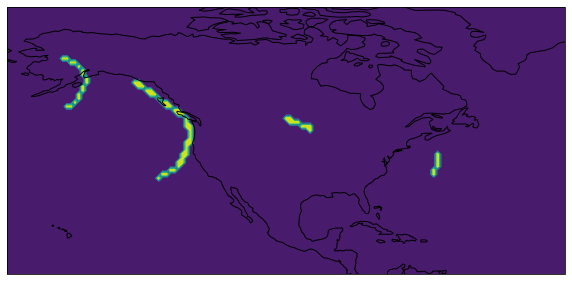

In [11]:
fig = plt.figure(figsize=(10, 7))
field = data.sel(front=0)
print(field)
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
for time in field.time[:10]:
    step = field.sel(time=time)
    print(time.data)
    ax.contourf(step.lon, step.lat, step.fronts, transform=cartopy.crs.PlateCarree())
# ax.scatter(mask.lon, mask.lat, field[:,:,0], transform=cartopy.crs.PlateCarree())
ax.coastlines()
plt.show()

# Check

In [39]:
data = xa.open_dataset('CODSUS/MERRA2/codsus_merra2-1deg_1wide_2018.nc')
print(data)

<xarray.Dataset>
Dimensions:     (front: 5, lat: 68, lon: 141, time: 2918)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  (front) object ...
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
  * time        (time) datetime64[ns] 2018-01-01 ... 2018-12-31T21:00:00
Dimensions without coordinates: front
Data variables:
    crs         float64 ...
    fronts      (time, front, lat, lon) float32 ...
Attributes:
    title:        Coded surface bulletins on a merra2-1deg grid.
    history:      2019-03-25T20:56:43.192174: /home/jbiard/SERDP/Python/jsonP...
    institution:  North Carolina Institute for Climate Studies (NCICS)
    Conventions:  CF-1.7


In [62]:
sub_id = 1
lons_sub = np.load('../ERA5/Calculations/' + str(sub_id) + '_lons.npy')
lats_sub = np.load('../ERA5/Calculations/' + str(sub_id) + '_lats.npy')
min_lat = np.min(lats_sub)
max_lat = np.max(lats_sub)
min_lon = np.min(lons_sub)
max_lon = np.max(lons_sub)
time1 = np.datetime64('2015-09-20T12')
time2 = np.datetime64('2015-09-21T12')
front = xa.open_dataset('CODSUS/MERRA2/codsus_merra2-1deg_1wide_2015.nc')
front = front.fronts
front_slice = front.sel(time=slice(time1, time2))
front_sub = front_slice.sel(lat=slice(min_lat - 5, max_lat + 5), lon=slice(min_lon - 5, max_lon + 5))

In [80]:
front_sub_sum = front_sub.sel(front=slice(0, 4)).sum(dim=['front', 'time'])
print(np.unique(front_sub_sum))
print(front_sub.sel(front=slice(0, 4)))

[0. 1.]
<xarray.DataArray 'fronts' (time: 9, front: 4, lat: 16, lon: 14)>
array([[[[0., ..., 0.],
         ...,
         [0., ..., 0.]],

        ...,

        [[0., ..., 0.],
         ...,
         [0., ..., 0.]]],


       ...,


       [[[0., ..., 0.],
         ...,
         [0., ..., 1.]],

        ...,

        [[0., ..., 0.],
         ...,
         [0., ..., 0.]]]], dtype=float32)
Coordinates:
  * lat         (lat) float64 18.0 19.0 20.0 21.0 22.0 ... 30.0 31.0 32.0 33.0
    front_type  (front) object 'cold' 'warm' 'stationary' 'occluded'
  * lon         (lon) float64 -118.0 -117.0 -116.0 ... -107.0 -106.0 -105.0
  * time        (time) datetime64[ns] 2015-09-20T12:00:00 ... 2015-09-21T12:0...
Dimensions without coordinates: front
Attributes:
    long_name:     front line images
    valid_min:     0
    grid_mapping:  crs
    valid_max:     1


In [64]:
front_sub_sum

<xarray.DataArray 'fronts' (time: 9, lat: 16, lon: 14)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 1., 0.],
        [0., 0., 1., ..., 0., 1., 1.]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 18.0 19.0 20.0 21.0 22.0 ... 29.0 30.0 31.0 32.0 33.0
  * lon      (lon) float64 -118.0 -117.0 -116.0 -115.0 ... -107.0 -106.0 -105.0
  * time     (time) datetime64[ns] 2015-09-20T12:00:00 ... 2015-09-21T12:00:00

In [65]:
front_sub
print(np.unique(front_sub.sel(front=0)))
print(np.unique(front_sub.sel(front=1)))
print(np.unique(front_sub.sel(front=2)))
print(np.unique(front_sub.sel(front=3)))
print(np.unique(front_sub.sel(front=4)))

[0. 1.]
[0. 1.]
[0. 1.]
[0.]
[0. 1.]


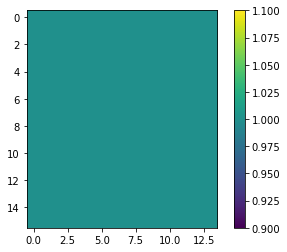

In [66]:
plt.imshow(front_sub.data[1, 4])
plt.colorbar()

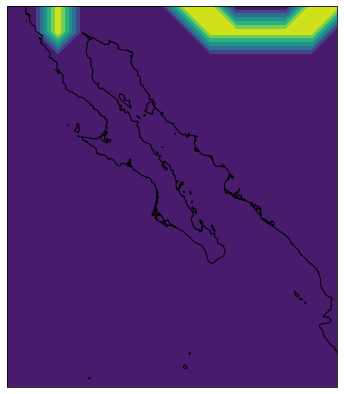

In [72]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.contourf(front_sub_sum.lon, front_sub_sum.lat, front_sub_sum.data, transform=cartopy.crs.PlateCarree())

ax.coastlines()
plt.show()

In [75]:
front_slice_time = front_slice.sum(dim='time')
front_slice_time

<xarray.DataArray 'fronts' (front: 5, lat: 68, lon: 141)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[9., 9., 9., ..., 9., 9., 9.],
        [9., 9., 9., ..., 9., 9., 9.],
        [9., 9., 9., ..., 9., 9., 9.],
        ...,
        [9., 9., 9., ..., 9., 9., 9.],
        [9., 9., 9., ..., 9., 9., 9.],
        [9., 9., 9., ..., 9., 9., 9.]]], dtype=float32)
Coordinates:
  * lat         (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 74.0 75.0 76.0 77.0
    front_type  (front) object 'cold' 'warm' 'stationary' 'occluded' 'none'
  * lon         (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0
Dimensions without coordinates: front

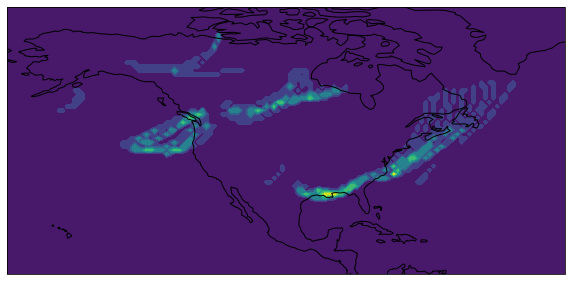

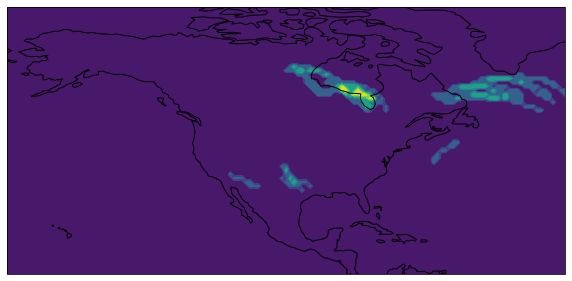

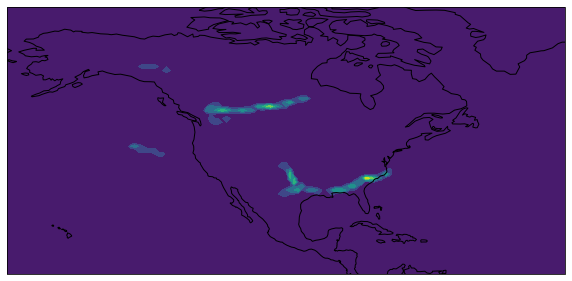

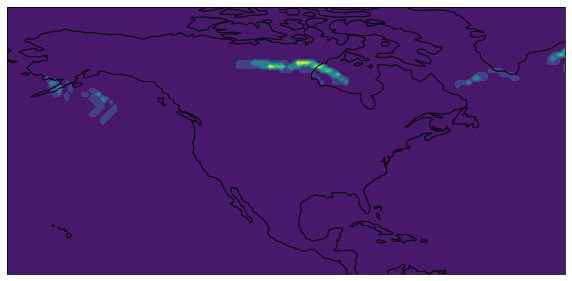

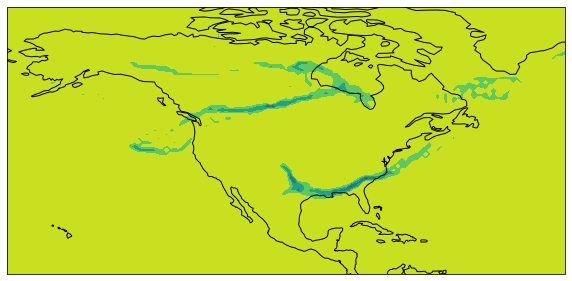

In [76]:
for i in range(5):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
    ax.contourf(front_slice_time.lon, front_slice_time.lat, front_slice_time.isel(front=i).data, transform=cartopy.crs.PlateCarree())

    ax.coastlines()
    plt.show()

In [77]:
np.unique(front_slice_time.isel(front=4).data, return_counts=True)

(array([0., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32),
 array([   1,    7,    7,   23,   39,   91,  238,  696, 8486]))

In [93]:
sub_id = 7
lons_sub = np.load('../ERA5/Calculations/' + str(sub_id) + '_lons.npy')
lats_sub = np.load('../ERA5/Calculations/' + str(sub_id) + '_lats.npy')
min_lat = np.min(lats_sub)
max_lat = np.max(lats_sub)
min_lon = np.min(lons_sub)
max_lon = np.max(lons_sub)
time1 = np.datetime64('2018-09-19T12')
time2 = np.datetime64('2018-09-21T12')
front = xa.open_dataset('CODSUS/MERRA2/codsus_merra2-1deg_1wide_2018.nc')
front = front.fronts
front_slice = front.sel(time=slice(time1, time2))
front_sub = front_slice.sel(lat=slice(min_lat - 5, max_lat + 5), lon=slice(min_lon - 5, max_lon + 5))

In [94]:
front_sum = front_slice.sel(front=slice(0, 4)).sum(dim=['time', 'front'])
print(front_sum)

<xarray.DataArray 'fronts' (lat: 68, lon: 141)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 10.0 11.0 12.0 13.0 14.0 ... 73.0 74.0 75.0 76.0 77.0
  * lon      (lon) float64 -171.0 -170.0 -169.0 -168.0 ... -33.0 -32.0 -31.0


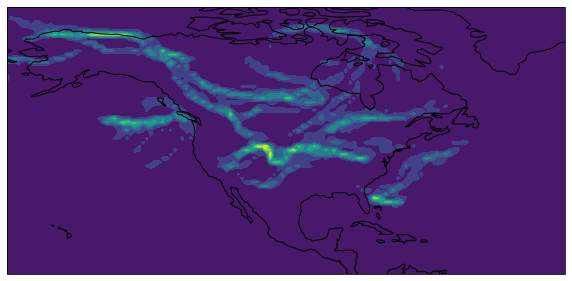

In [95]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.contourf(front_sum.lon, front_sum.lat, front_sum.data, transform=cartopy.crs.PlateCarree())

ax.coastlines()
plt.show()

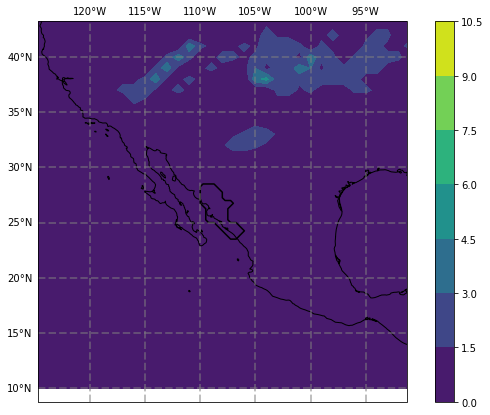

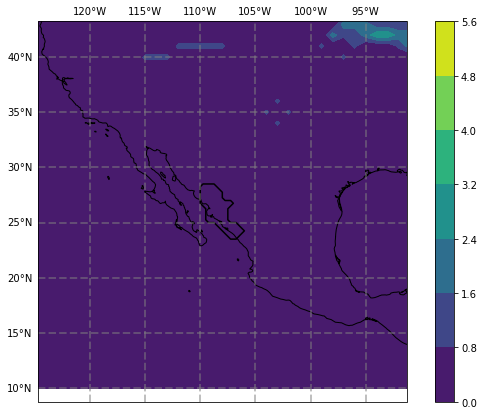

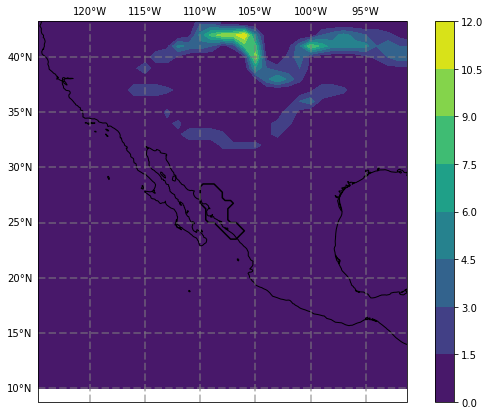

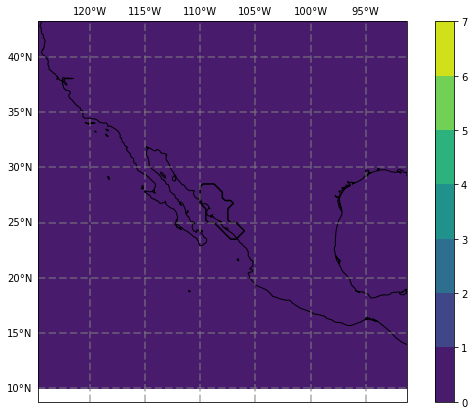

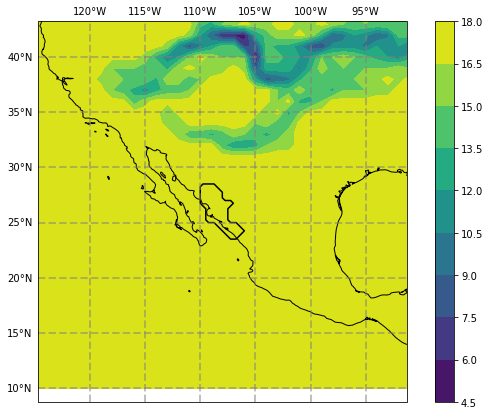

In [99]:
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER

for i in range(5):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
    gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=2, color="gray", alpha=0.5, linestyle="--")
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    con = ax.contourf(front_sum.lon, front_sum.lat, front_slice.isel(front=i).sum(dim='time').data, transform=cartopy.crs.PlateCarree())
    fname = "/tempest/duan0000/exprecip/cpc-global/NAM_SUB_SHAPES/NAM-mask-" + str(sub_id) + ".shp"
    shape_feature = ShapelyFeature(Reader(fname).geometries(), cartopy.crs.PlateCarree(), facecolor="none", linewidth=1.5)
    ax.add_feature(shape_feature)
    ax.coastlines()
    ax.set_extent([min_lon - 15, max_lon + 15, min_lat - 15, max_lat + 15], crs=cartopy.crs.PlateCarree())
    plt.colorbar(con)
    plt.show()

In [100]:
sub_id = 7
lons_sub = np.load('../ERA5/Calculations/' + str(sub_id) + '_lons.npy')
lats_sub = np.load('../ERA5/Calculations/' + str(sub_id) + '_lats.npy')
min_lat = np.min(lats_sub)
max_lat = np.max(lats_sub)
min_lon = np.min(lons_sub)
max_lon = np.max(lons_sub)
time1 = np.datetime64('2015-09-11T12')
time2 = np.datetime64('2015-09-12T12')
front = xa.open_dataset('CODSUS/MERRA2/codsus_merra2-1deg_1wide_2015.nc')
front = front.fronts
front_slice = front.sel(time=slice(time1, time2))
front_sub = front_slice.sel(lat=slice(min_lat - 5, max_lat + 5), lon=slice(min_lon - 5, max_lon + 5))

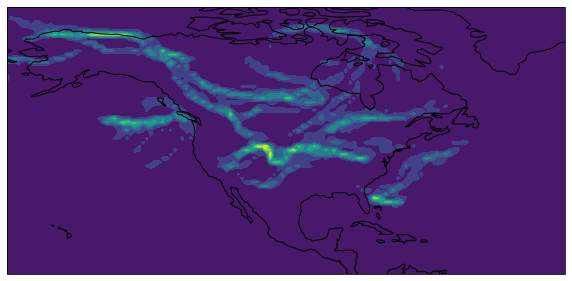

In [101]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.contourf(front_sum.lon, front_sum.lat, front_sum.data, transform=cartopy.crs.PlateCarree())

ax.coastlines()
plt.show()

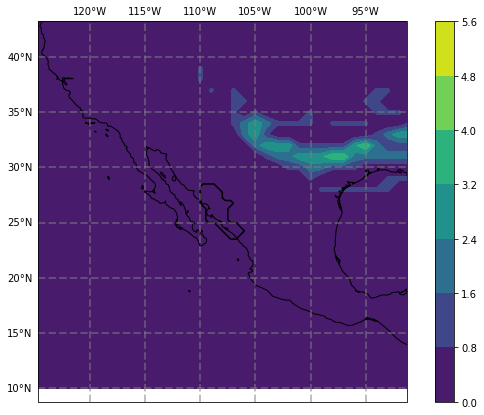

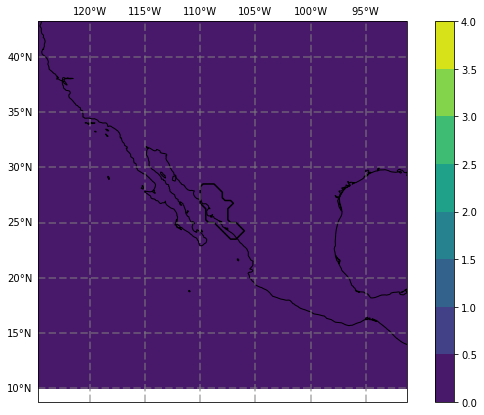

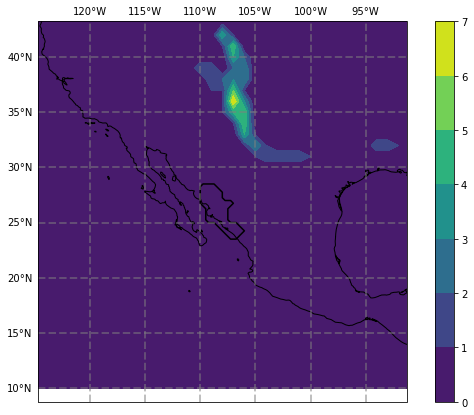

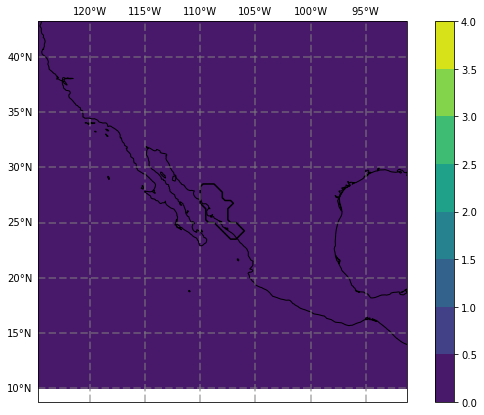

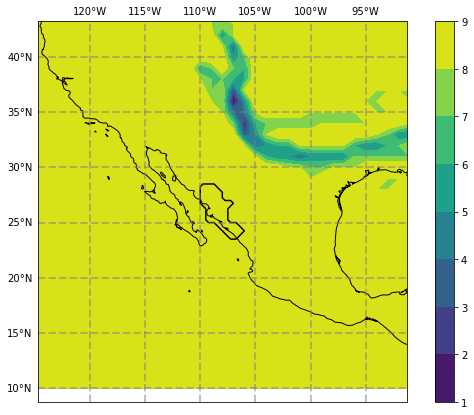

In [102]:
for i in range(5):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
    gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=2, color="gray", alpha=0.5, linestyle="--")
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    con = ax.contourf(front_sum.lon, front_sum.lat, front_slice.isel(front=i).sum(dim='time').data, transform=cartopy.crs.PlateCarree())
    fname = "/tempest/duan0000/exprecip/cpc-global/NAM_SUB_SHAPES/NAM-mask-" + str(sub_id) + ".shp"
    shape_feature = ShapelyFeature(Reader(fname).geometries(), cartopy.crs.PlateCarree(), facecolor="none", linewidth=1.5)
    ax.add_feature(shape_feature)
    ax.coastlines()
    ax.set_extent([min_lon - 15, max_lon + 15, min_lat - 15, max_lat + 15], crs=cartopy.crs.PlateCarree())
    plt.colorbar(con)
    plt.show()

In [103]:
def distance_criteria(x, y, lons, lats):  # return distance.
    dis = 12345
    if x > 180: x = x - 360
    for lon, lat in zip(lons, lats):
        if lon > 180: lon = lon - 360
        distance = np.sqrt(np.square(x - lon) + np.square(y - lat))
        if distance <= 5:
            return True
        if dis > distance:
            dis = distance
    return dis

In [106]:
flag=0
for x in front_sub.lon:
    for y in front_sub.lat:
        # print(front_sub.shape, ' ', front_sub)
        if front_sub.sel(lon=x, lat=y, front=slice(0, 4)).sum(
                dim=['time', 'front']) > 0:  # there is a front point
            dis = distance_criteria(x, y, lons_sub, lats_sub)
            if dis == True:
                print(x.data, y.data)
                flag = 1
                break


-106.0 32.0
-105.0 31.0
